In [42]:
import numpy as np

#problem1
#define the function to compute optimal slope value 
def compute_slope_estimator(x, y):
    x_bar = np.average(x)
    y_bar = np.average(y)
    n = x.shape[0]
    numerator = np.dot(x, y) - n * x_bar * y_bar
    denominator = np.dot(x, x) - n * np.square(x_bar)
    
    #calculate the optimal slope
    a = numerator/denominator
    return a 


In [43]:
#problem 2
#define the function to compute the optimal intercept value
def compute_intercept_estimator(x, y):
    a = compute_slope_estimator(x, y)
    x_bar = np.average(x)
    y_bar = np.average(y)
    
    #calculate the optimal intercept
    b = y_bar - a * x_bar
    return b
    

In [44]:
#problem 3
#define the function to train model using input data
def train_model(x, y):
    a = compute_slope_estimator(x, y)
    b = compute_intercept_estimator(x, y)
    
    tup = (a, b)
    return tuple


In [45]:
#problem4
#define the function to get y values from the generative model 
def sample_linear_model(x_vals, a, b, sd):
    n = x_vals.shape[0]
    y = np.zeros(n)
    e = np.random.normal(0, sd, n)
    
    #get y's values 
    for i in range(n):
        y[i] = a * x_vals[i] + b + e[i]
        
    #return y 
    return y




In [46]:
#problem 5
#define the function to get a list of n sampled datasets 
def sample_datasets(x_vals, a, b, sd, n):
    ls = []
    
    #build the list of n datasets 
    for i in range(n):
        y_vals = sample_linear_model(x_vals, a, b, sd)
        ls.append(y_vals)
    
    #return the list of datasets // a list of arrays containing y values 
    return ls


In [47]:
#problem 6
#define the function to compute the average estimated slope
def compute_average_estimated_slope(x_vals):
    ls_a = []
    ls_y = sample_datasets(x_vals, 1, 1, 1, 1000)
    
    #compute the slope estimator
    for i in range(1000):
        a = compute_slope_estimator(x_vals, ls_y[i])
        ls_a.append(a)
        
    
    #compute the average of estimated slope
    average_a = sum(ls_a)/len(ls_a)
    
    return average_a



In [49]:
#problem 7
#compute the average estimated slope for different values of x_vals
ls_a = []

x_vals1 = np.linspace(0, 1, num=5)
a1 = compute_average_estimated_slope(x_vals1)
ls_a.append(a1)

x_vals2 = np.linspace(0, 1, num=100)
a2 = compute_average_estimated_slope(x_vals2)
ls_a.append(a2)

x_vals3 = np.linspace(0, 1, num=1000)
a3 = compute_average_estimated_slope(x_vals3)
ls_a.append(a3)

print(ls_a)
    
    

[0.994829212329086, 0.9899567063400891, 0.9918634572065034]


In [48]:
#Answer to question 7: When the number of x_vals increases, the estimated slope tend to 
#be closer to the true slope. The reason is that slope estimator tends to be more accurate
#when n(number of x_vals) is large

In [50]:
#problem 8
#define the functin to compute average squared error
def compute_estimated_slope_error(x_vals):
    ls_a = []
    ls_squar = []
    ls_y = sample_datasets(x_vals, 1, 1, 1, 1000)
    
    #compute the slope estimator
    for i in range(1000):
        a = compute_slope_estimator(x_vals, ls_y[i])
        ls_a.append(a)
        
    
    #compute the average squared error
    for i in range(1000):
        squar = (1 - ls_a[i]) * (1 - ls_a[i])
        ls_squar.append(squar)
    
    average_squared_error_estimated_slope = sum(ls_squar)/len(ls_squar)
    
    return average_squared_error_estimated_slope


In [51]:
#problem 8 test with different values of x_vals
ls_average_squared_error_estimated_slope = []

x_vals1 = np.linspace(0, 1, num=5)
a1 = compute_estimated_slope_error(x_vals1)
ls_average_squared_error_estimated_slope.append(a1)

x_vals2 = np.linspace(0, 1, num=100)
a2 = compute_estimated_slope_error(x_vals2)
ls_average_squared_error_estimated_slope.append(a2)

x_vals3 = np.linspace(0, 1, num=1000)
a3 = compute_estimated_slope_error(x_vals3)
ls_average_squared_error_estimated_slope.append(a3)

print(ls_average_squared_error_estimated_slope)
    

[1.6807914719396964, 0.11058047803047509, 0.012378659613540965]


In [52]:
#Answer to problem 8
#As n increases, the average squared error decreases. The reason is that the estimators for slope and intercept
#tends to be more accurate when the n(number of x_vals) is large. 

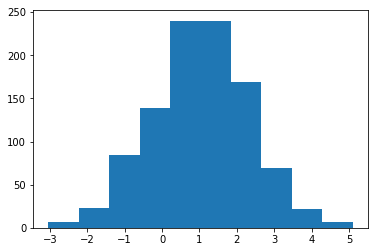

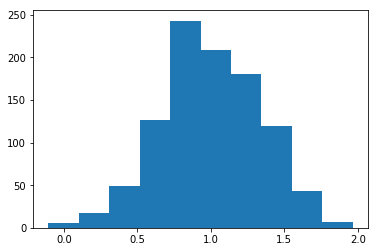

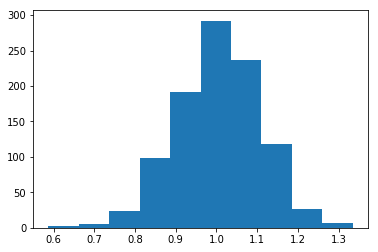

<Figure size 432x288 with 0 Axes>

In [53]:
#problem 9
import matplotlib.pyplot as plt

#first trial
ls_a_1 = []               #create numpy to store estimated slope
x_vals_1 = np.linspace(0, 1, num=5)     #try different size and values of x_vals
ls_y_1 = sample_datasets(x_vals_1, 1, 1, 1, 1000)
    
#compute the slope estimator
for i in range(1000):
    a = compute_slope_estimator(x_vals_1, ls_y_1[i])
    ls_a_1.append(a)

    
#second trial
ls_a_2 = []               #create numpy to store estimated slope
x_vals_2 = np.linspace(0, 1, num=100)   #try different size and values of x_vals
ls_y_2 = sample_datasets(x_vals_2, 1, 1, 1, 1000)
    
#compute the slope estimator
for i in range(1000):
    a = compute_slope_estimator(x_vals_2, ls_y_2[i])
    ls_a_2.append(a)

    
#third trial
ls_a_3 = []               #create numpy to store estimated slope
x_vals_3 = np.linspace(0, 1, num=1000)   #try different size and values of x_vals
ls_y_3 = sample_datasets(x_vals_3, 1, 1, 1, 1000)
    
#compute the slope estimator
for i in range(1000):
    a = compute_slope_estimator(x_vals_3, ls_y_3[i])
    ls_a_3.append(a)

     
    
#draw the histogram
array_a_1 = np.array(ls_a_1)
plt.hist(array_a_1)
plt.show()
plt.savefig("9_1.png")
    
array_a_2 = np.array(ls_a_2)
plt.hist(array_a_2)
plt.show()
plt.savefig("9_2.png")

array_a_3 = np.array(ls_a_3)
plt.hist(array_a_3)
plt.show()    
plt.savefig("9_3.png")


In [54]:
#Answer to problem 9:
#As number of x_vals increases, more slope estimates concentrate around
#the true slope which is 1. The reason is that slope estimator tends to be more accurate when n(number of x_vals)
#is large 

In [55]:
#Problem10
#define function to calculate prediction error
def calculate_prediction_error(y, y_hat):
    n = y.shape[0]      #get the size of the array
    
    #calculate the prediction error
    ls_squar = []
    
    for i in range(n):
        squar = (y[i] - y_hat[i]) * (y[i] - y_hat[i])
        ls_squar.append(squar)

    prediction_error = sum(ls_squar)/n
    
    return prediction_error


In [61]:
#Problem 11
#define the function to calculate the average training set error
def average_training_set_error(x_vals):
    ls_y = sample_datasets(x_vals, 1, 1, 1, 1000)  #sample y
    ls_y_hat = []        #list to store estimated y
    ls_a_hat = []        #list to store slope estimator
    ls_b_hat = []        #list to store intercept estimator
    
    #compute slope and intercept estimator
    for i in range(1000):
        a_hat = compute_slope_estimator(x_vals, ls_y[i])
        b_hat = compute_intercept_estimator(x_vals, ls_y[i])
        ls_a_hat.append(a_hat)     #store slope estimator
        ls_b_hat.append(b_hat)    #store intercept estimator
    
    #compute estimated y
    n = x_vals.shape[0]
    for i in range(1000):
        ls_y_hat_sub = []
        for j in range(n):
            y_hat = ls_a_hat[i] * x_vals[j] + ls_b_hat[i]
            ls_y_hat_sub.append(y_hat)
        
        array_y_hat = np.array(ls_y_hat_sub)
        ls_y_hat.append(array_y_hat)
    
    
    #calculate prediction error
    ls_pi = []              #list to store pi
    for i in range(1000):
        prediction_error = calculate_prediction_error(ls_y[i], ls_y_hat[i])
        ls_pi.append(prediction_error)
        
    average_error = sum(ls_pi)/len(ls_pi)
    return average_error
    
        
    
            
    
       
        
        
        
        

In [60]:
#Problem 11
#first trial 
x_vals = np.linspace(0, 1, num = 5)
print(average_training_set_error(x_vals))

#second trial 
x_vals = np.linspace(0, 1, num = 100)
print(average_training_set_error(x_vals))


#third trial 
x_vals = np.linspace(0, 1, num = 1000)
print(average_training_set_error(x_vals))

0.5860283674958423
0.9832899200875935
0.9981184824205734


In [57]:
#Answer to problem 11
#As number of elements in x_vals increases, the average prediction error approaches 1. The reason is that when we 
#sample from y, we set the error's standard deviation to 1. 

In [70]:
#define the function to calculate the average value of the errors 
#by testing the linear model against data other than those used to 
#build the model
#output a single value of average value of the errors 


def average_test_set_error(x_vals): 
    ls_y = sample_datasets(x_vals, 1, 1, 1, 1000)          #return a list containing 1000 arrays of y
    n = x_vals.shape[0]                                    #get the size of the x_vals array
    array_y = sample_linear_model(x_vals, 1, 1, 1)         #build one test set for every training set
    sum = 0                                                #initialize sum to calculate prediction error
    
    for each in ls_y:
        a_hat = compute_slope_estimator(x_vals, each)
        b_hat = compute_intercept_estimator(x_vals, each)
        
        #get an array of y_hat
        array_y_hat = np.zeros(n)
        for i in range(n):
            array_y_hat[i] = a_hat * x_vals[i] + b_hat
        
        prediction_error = calculate_prediction_error(array_y, array_y_hat)
        sum = sum + prediction_error
    
    average_prediction_error = sum/1000
    return average_prediction_error
        
        

In [75]:
#Problem 12
#first trial 
x_vals = np.linspace(0, 1, num = 5)
print(average_test_set_error(x_vals))

#second trial 
x_vals = np.linspace(0, 1, num = 100)
print(average_test_set_error(x_vals))


#third trial 
x_vals = np.linspace(0, 1, num = 1000)
print(average_test_set_error(x_vals))

1.5716418186633068
0.9060201127184658
0.9750786861834995


In [59]:
#The test set prediction error is more random than the average training
#set prediction error. The average test set prediction error sometimes is 
#larger than 1, and sometimes is smaller than 1. The reason is that we 
#test our models on the test set instead of training set.
#As the number of elements in x_vals increases, the average test set prediction
#error generally tends to 1. The reason is that we set the standard deviation 
#to 1 when we sample from y and the estimator tends to be more accurate when
#n(number of x_vals) is large. 